In [71]:
import pandas as pd

df = pd.read_csv('Data.csv')
df = df.dropna()


Q. Finding Average and median prices of the houses in Melbourne

In [72]:
meanPrice = df['Price'].mean().round()
medianPrice = df['Price'].median()

print("Mean: ", meanPrice)
print("Median: ", medianPrice)

Mean:  1092902.0
Median:  900000.0


Q. What are the top 3 most expensive suburbs to buy a house? 

In [73]:
suburbPrices = df.groupby(['Suburb'])['Price'].mean().round().sort_values(ascending=False)

suburbPrices.head(3)

Suburb
Kooyong        3080000.0
Middle Park    2665115.0
Canterbury     2467463.0
Name: Price, dtype: float64

Q. What are the price ranges in all the four regions? 

In [81]:
lowestPrices = df.groupby(['Regionname'])['Price'].min().rename("Lowest")
highestPrices = df.groupby(['Regionname'])['Price'].max().rename("Highest")

combined = pd.concat([lowestPrices ,highestPrices ], axis=1)

combined["Range"] = combined["Highest"] - combined["Lowest"]
combined.sort_values('Range', ascending = False)

,Lowest,Highest,Range
Regionname,,,
South-Eastern Metropolitan,305000.0,9000000.0,8695000.0
Southern Metropolitan,131000.0,8000000.0,7869000.0
Eastern Metropolitan,360000.0,4600000.0,4240000.0
Northern Metropolitan,145000.0,4011000.0,3866000.0
Western Metropolitan,170000.0,3900000.0,3730000.0
Northern Victoria,345000.0,1350000.0,1005000.0
Eastern Victoria,435000.0,1075000.0,640000.0
Western Victoria,283000.0,892000.0,609000.0


In [ ]:
combined.plo

Q. Compare prices of the properties with the distance from city

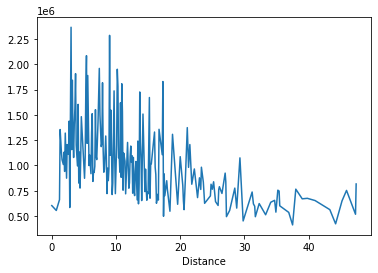

In [75]:
k = df.groupby(['Distance'])['Price'].mean().round().plot()


A Scatter Plot is as follows:

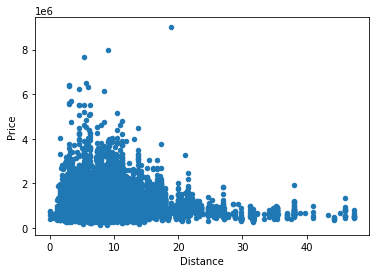

In [76]:
distGraph = df.plot.scatter(x='Distance', y='Price')

Q. Do the prices increase over the years? We check this by plotting a graph

AttributeError: 'AxesSubplot' object has no attribute 'line'

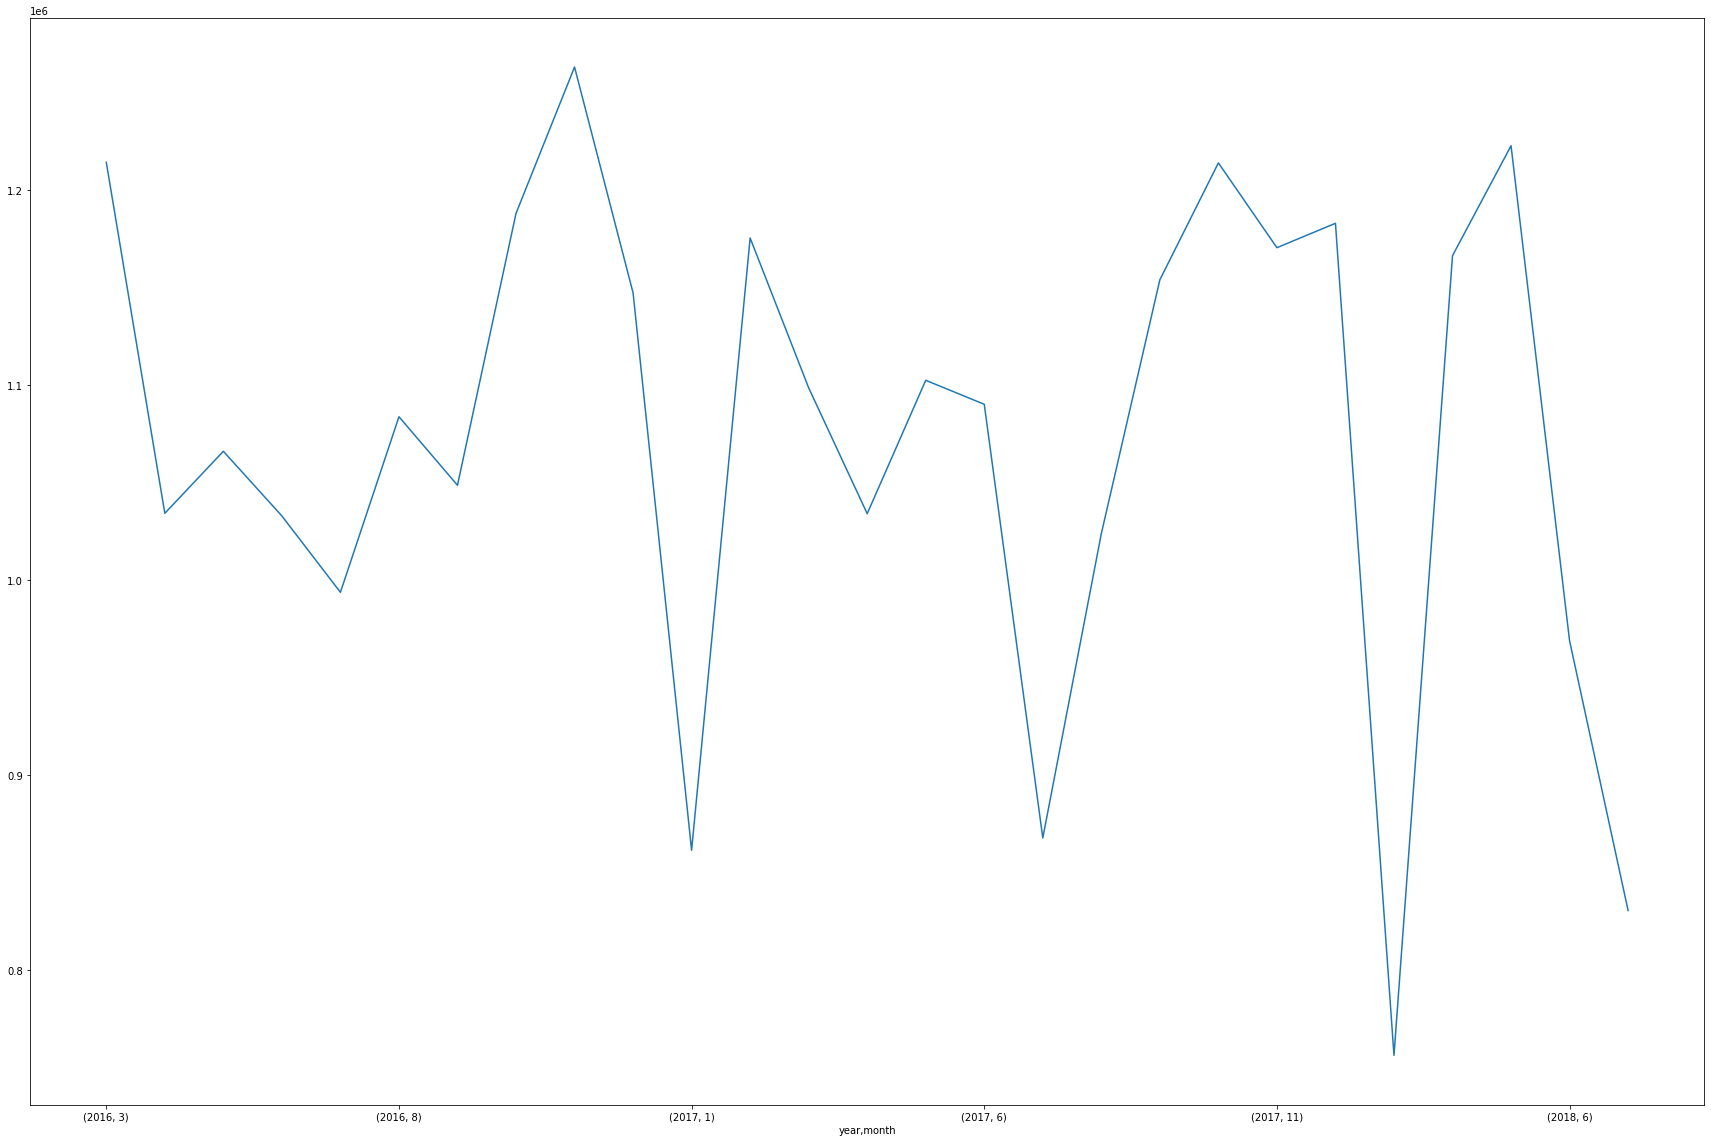

In [77]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month

priceByDate = df.groupby(['year','month'])['Price'].mean()

lines = priceByDate.plot(figsize=(30,20)).line(x='price', y='month')

lines